Importing initial libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

A quick comparison of basic info of the data sets test won't be looked at again until testing the models produced by the work done on train data sets

In [29]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What would be the test data set

In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


From the above some info found out to compare them is that train data set has 891 entries while the test set has 418 entries 32% of the total data is in the test data, the rest is in the training data format between the two types of data is similar

Using the info for the training data we can see that there are 12 columns of data, with missing data in Age (177/891 null), Cabin (687/891 null) and Embarked (2/891 null) can confirm this visually using a heatmap plot where empty data sections will appear as a different colour, via isnull()

Initial Exploratory Analysis

<AxesSubplot:>

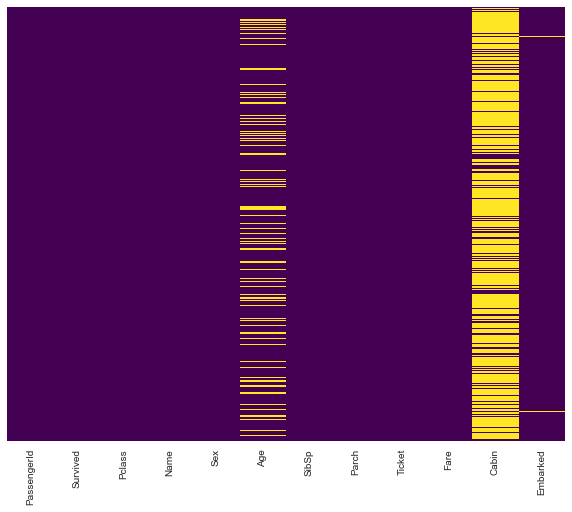

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From head() and can confirm this using tail() we can tell that Passenger ID is just effectively an index value

In [37]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Checking for correlation between 'Sex' and 'Survived'

<AxesSubplot:xlabel='Survived', ylabel='count'>

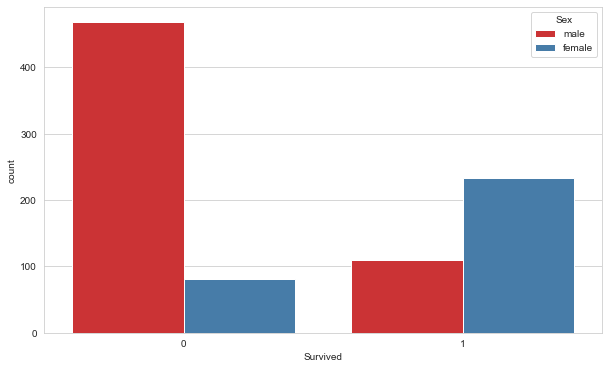

In [38]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_df,x='Survived',hue='Sex',palette='Set1')

Checking for correlation between 'Pclass' (passenger class, 1st, 2nd, 3rd) and 'Survived'

<AxesSubplot:xlabel='Survived', ylabel='count'>

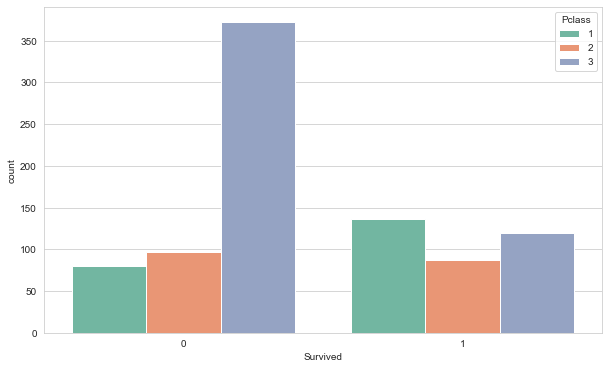

In [39]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_df, x='Survived',hue='Pclass',palette='Set2')

These two previous plots show males and lower class passengers were less likely to survive

following the same idea for 'Embarked' and 'Survived'

<AxesSubplot:xlabel='Survived', ylabel='count'>

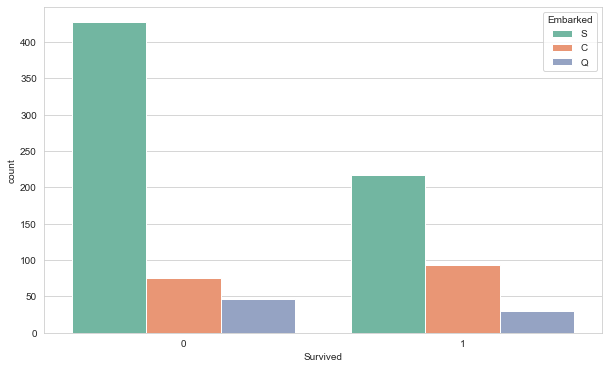

In [40]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(data=train_df, x='Survived',hue='Embarked',palette='Set2')

(S,C,Q) represent (Southampton, Cherbourg, Queenstown) which was the stops on the journey before departing across the Atlantic, ther does appear to be a higher survival rate for passengers from C

Creating a separate df for the numerical fields and comparing them to if they survived. For reference the two not automatically clear titles, they mean who they were travelling with as a total where SibSp = siblings/ spouse, Parch = parents/ children

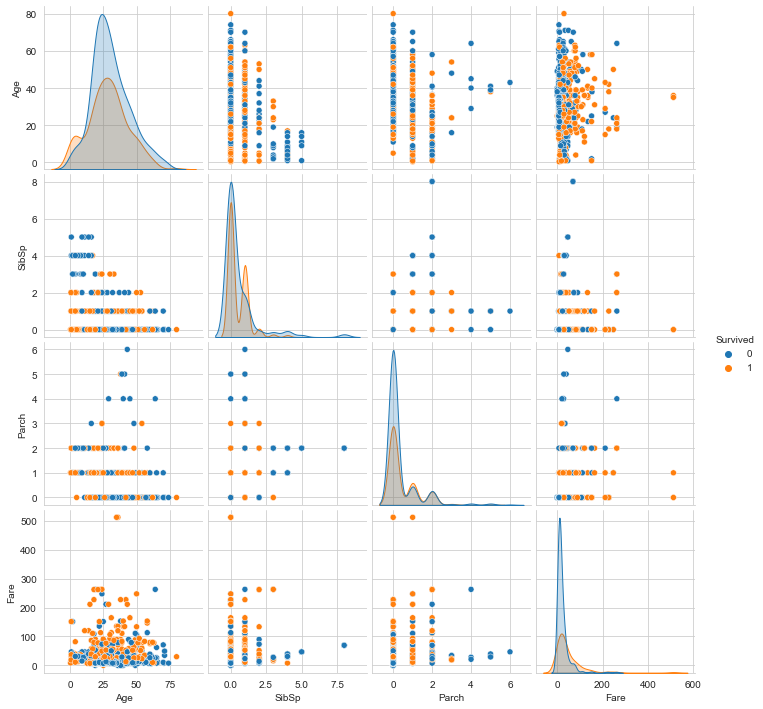

In [41]:
num_df = train_df[['Survived','Age','SibSp','Parch','Fare']]
sns.set_style('whitegrid')
sns.pairplot(num_df, hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Count'>

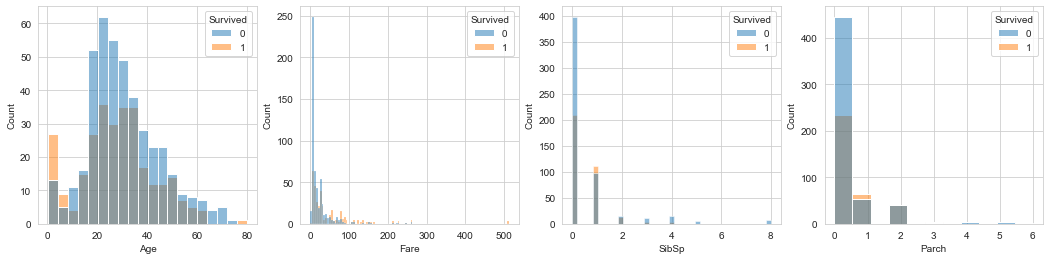

In [16]:
# looking at them individually

plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.histplot(data=train_df, x='Age', hue='Survived')

plt.subplot(1,4,2)
sns.histplot(data=train_df, x='Fare', hue='Survived')

plt.subplot(1,4,3)
sns.histplot(data=train_df, x='SibSp', hue='Survived')

plt.subplot(1,4,4)
sns.histplot(data=train_df, x='Parch', hue='Survived')

Age: looks normally distributed, the highest survival rate for the youngest, most deaths in the 20-30 range and poor survival rate for the oldest (even if the oldest individual looks like they survived)

Fare: mostly cheaper fares, some extreme value around 500 that affects this plot in terms of being good for readability but more expensive fares werelikely to survive

SibSp: no survival rate for larger groups of siblings/ spouses, the majority of survivors and passengers overall were without sib/sp

Parch: more likely to survive with 1-2 parents/ children but combined with SibSp data it seems many passengers were on their own

Data Correlation

Producing a heat map to check the strength of correlation between the numerical fields (num_df)

<AxesSubplot:>

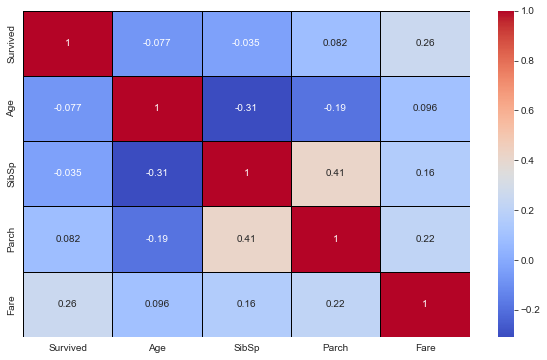

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(),cmap='coolwarm',annot=True,lw=1,linecolor='black')

Initial correlation check has a moderate positive one between SibSp and Parch and a weak positive one between Parch and Fare while Age seems to be lacking a correlation with Survived

Data Cleaning

From previous stuff we know there is some missing age data, a lot of missing cabin data and two cases of missing embarked data
to handle the missing age data will try estimating ages using other data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

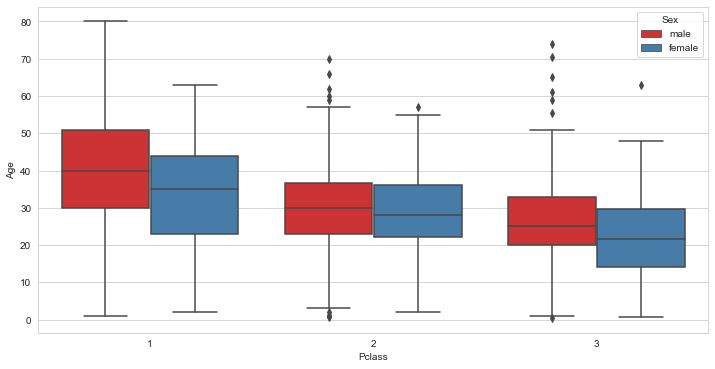

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df,x='Pclass',y='Age',hue='Sex',palette='Set1')

From this can see age increases with lower class (numerically, not wording) and males are slightly older than females in all classes

Using the medians from the graph will be Pclass = 1, male 40, female 35; Pclass = 2, male 30, female 28 and Pclass = 3, male 25, female 22

Creating a function that will put in the above median ages where the age value is missing

In [44]:
def age_estimate(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]

    if pd.isnull(Age):
        if Pclass == 1:
            if Sex == 'male':
                return 40
            else:
                return 35
        elif Pclass == 2:
            if Sex == 'male':
                return 30
            else:
                return 28
        else:
            if Sex == 'male':
                return 25
            else:
                return 22
    else:
        return Age

Calling the function to update the missing ages through apply()

In [45]:
train_df['Age'] = train_df[['Age','Pclass','Sex']].apply(age_estimate, axis=1)

<AxesSubplot:>

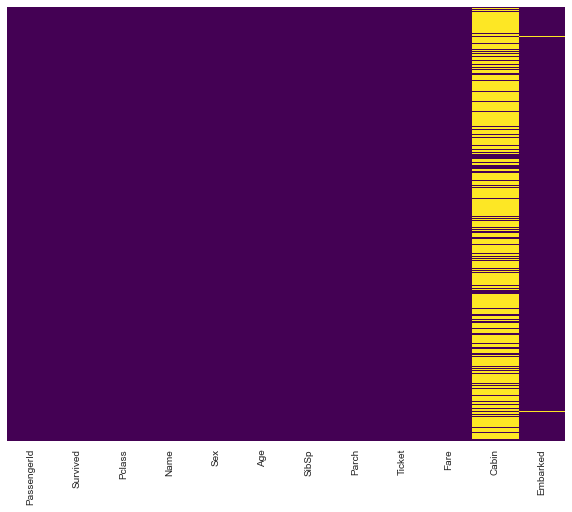

In [46]:
# checking these updated values via isnull()
plt.figure(figsize=(10,8))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Dropping the cabin column due to it mostly being incomplete data but could come back to this later

In [47]:
train_df.drop('Cabin',axis=1,inplace=True)

Finally dropping the two incomplete entries for embarked

In [48]:
train_df.dropna(inplace=True)

Converting categorical features into numerical using pd.get_dummies

In [49]:
gender = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

Removing the columns that are no longer needed and other info that doesn't help with the current model aims such as Name and Ticket also removal of Passenger Id as it's just the same as an Index column. Then adding the replacement numerical columns produced by the get_dummies above

In [50]:
train_df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
train_df = pd.concat([train_df,gender,embark],axis=1)

In [51]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Can see these changes applied to the data in the above head() leaving only numerical non-null values to be able to perform modelling on.

Setting up the training data for the modelling

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.4)

In [55]:
from sklearn.linear_model import LogisticRegression

Applying a logistic regression model to the data

In [56]:
lmodel = LogisticRegression(max_iter=500)
lmodel.fit(x_train,y_train)
pred = lmodel.predict(x_test)

Producing classification report and confusion matrix to see how effective the logisitic model is

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       212
           1       0.79      0.69      0.73       144

    accuracy                           0.80       356
   macro avg       0.80      0.78      0.79       356
weighted avg       0.80      0.80      0.80       356



In [59]:
print(confusion_matrix(y_test,pred))

[[185  27]
 [ 45  99]]


More to be done later